<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/non_seprable_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Classification on a non-seprable dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression

(500, 2)


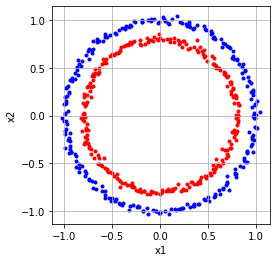

In [61]:
# generating data 
x, y = make_circles(n_samples = 500, noise = 0.02)
print(x.shape)

# visualizing data
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.scatter(x[:, 0], x[:, 1], c = y, marker = '.') 
plt.scatter(x[y==1, 0], x[y==1, 1], marker = '.', color='red') 
plt.scatter(x[y==0, 0], x[y==0, 1], marker = '.', color='blue') 
ax.set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show() 

(500, 3)


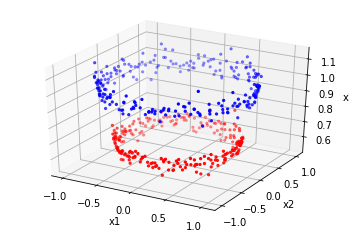

In [70]:
# adding a new dimension to X 
x1 = x[:, 0].reshape((-1, 1))
x2 = x[:, 1].reshape((-1, 1)) 
x3 = (x1**2 + x2**2)

X = np.hstack((x, x3))
print(X.shape)
  
# visualizing data in higher dimension 
# adding higher order features to make it linearly seprable (hybothesis: w0+w1*x1+w2*x2+w3*x1^2+w4*x2^2>=0)
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(x1[y==1], x2[y==1], x3[y==1], marker = '.', color='red') 
ax.scatter(x1[y==0], x2[y==0], x3[y==0], marker = '.', color='blue') 
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [76]:
# fit a logistic regression (classification) model
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)

error = np.mean(y-y_pred)
print(error)

[[-2.24403802e-02 -1.60274633e-03 -1.09017032e+01]]
[8.91266605]
0.0


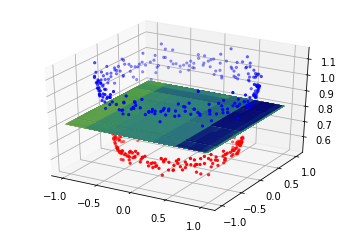

In [77]:
# plotting the separating hyperplane 
x1g, x2g = np.meshgrid(x1, x2) 
w = model.coef_
b = model.intercept_
x3g = -(w[0][0]*x1g + w[0][1]*x2g + b) / w[0][2] 

mycmap = plt.get_cmap('gist_earth')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1g, x2g, x3g, alpha = 0.8, cmap=mycmap, rstride=8, cstride=8)
ax.scatter(x1[y==1], x2[y==1], x3[y==1], marker = '.', color='red') 
ax.scatter(x1[y==0], x2[y==0], x3[y==0], marker = '.', color='blue')
plt.show()